In [11]:
# Create a plot for one team, one year, 2 variables
# Steps:
#  1. Import and clean the data
#  2. Create a function extract a DataFrame based on the team, year
#  3. Create a line plot with 2 valiables from the extracted data
# NOTE: Team 13 is the St. Louis Rams, they won the Superbowl in 
#       the 1999 season.

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.polynomial.polynomial import polyfit
%matplotlib inline

In [13]:
# Function to clean the data
def clean(orig_df):
    df2 = orig_df[orig_df["yards_per_pass_attempt"] > -100]
    df3 = df2[df2["passes_had_intercepts"] >= 0]
    df4 = df3[df3["qb_sacks"] >= 0]
    return df4

In [14]:
#Read in the CSV file
file = "Resources/pass_att.csv"
df = clean(pd.read_csv(file))
df.head()

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
0,6,1993,4,-1.6,-13.0,24.0,1.0,5.0
1,1,1993,1,-3.7,-17.0,8.0,2.0,6.0
2,2,1993,1,-0.5,-4.0,21.0,1.0,0.0
3,3,1993,1,2.7,24.0,42.0,1.0,1.0
4,4,1993,1,-1.5,-6.0,25.0,1.0,4.0


In [15]:
# Get a stat for a var/team/week/year
def get_stat(df, var_name, team_num, week, year):
    val = df[(df['team'] == team_num) & (df['week'] == week) & (df['year'] == year)][var_name]
    #returns a series (a list) and the first element is the index number. So val[1] is what we want
    return val[1]
    

In [16]:
# Get a stat for a var/team/year. Reurns a DataFrame.
def get_stat_for_year(df, var_name, team_num, year):
    val = df[(df['team'] == team_num) & (df['year'] == year)]
    return val

In [17]:
val = get_stat(df, 'winning_margin', 1, 1, 1993)
print(val)

-17.0


In [18]:
# Get the stats for a team and a year, into a DataFrame
df2 = get_stat_for_year(df, 'yards_per_pass_attempt', 13, 1999)
df2.head(20)

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
3066,13,1999,16,2.6,22.0,27.0,1.0,0.0
3097,13,1999,1,2.4,17.0,25.0,2.0,3.0
3128,13,1999,2,2.4,17.0,25.0,2.0,3.0
3159,13,1999,3,6.0,28.0,34.0,0.0,0.0
3189,13,1999,4,9.8,28.0,28.0,0.0,2.0
3220,13,1999,5,6.6,22.0,28.0,1.0,1.0
3251,13,1999,6,-2.8,28.0,28.0,0.0,2.0
3282,13,1999,7,2.1,31.0,29.0,0.0,2.0
3313,13,1999,8,-0.4,-3.0,19.0,0.0,6.0
3344,13,1999,9,-1.6,-4.0,16.0,2.0,4.0


In [19]:
df2 = df2.sort_values(by=['week'])
df2.head(20)

,team,year,week,yards_per_pass_attempt,winning_margin,total_rushing,passes_had_intercepts,qb_sacks
3097,13,1999,1,2.4,17.0,25.0,2.0,3.0
3128,13,1999,2,2.4,17.0,25.0,2.0,3.0
3159,13,1999,3,6.0,28.0,34.0,0.0,0.0
3189,13,1999,4,9.8,28.0,28.0,0.0,2.0
3220,13,1999,5,6.6,22.0,28.0,1.0,1.0
3251,13,1999,6,-2.8,28.0,28.0,0.0,2.0
3282,13,1999,7,2.1,31.0,29.0,0.0,2.0
3313,13,1999,8,-0.4,-3.0,19.0,0.0,6.0
3344,13,1999,9,-1.6,-4.0,16.0,2.0,4.0
3375,13,1999,10,4.1,25.0,20.0,1.0,0.0


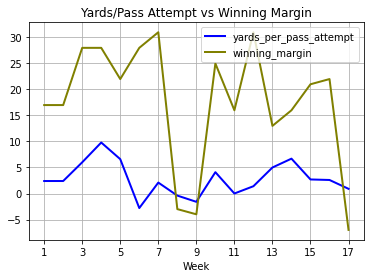

In [20]:

plt.plot( 'week', 'yards_per_pass_attempt', data=df2, marker='', markerfacecolor='blue', markersize=12, color='blue', linewidth=2)
plt.plot( 'week', 'winning_margin', data=df2, marker='', color='olive', linewidth=2)

# Set the plot texts as described in Module 5.1.4
plt.title("Yards/Pass Attempt vs Winning Margin")
plt.xlabel("Week")
plt.legend()

plt.xticks(np.arange(1, len(df2['week']) + 1, 2))

plt.grid()

plt.show()